In [1]:
# Import libraries
import xarray
import numpy as np
import rasterio
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Question 1

* a) the air temperature (in F) **and** cloud cover (in %) in Florence, OR (in 2020) on **January 31, 2020**?

In [2]:
filepath = 'C:/Users/theoh/Downloads/lab4/'

In [3]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')

In [4]:
# Resample to daily values
xds_daily = xds.resample(time='1D').mean()

In [5]:
# Find the index of the grid point nearest Florence, OR   
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')

C:\Users\theoh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\theoh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [6]:
fahrenheit = (florence_weather['t2m'][31].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on Jan 31, 2020 = %.2f F' % (fahrenheit))

Air temperature in Florence on Jan 31, 2020 = 54.04 F


In [7]:
print('Cloud cover in Florence on Jan 31, 2020 = %.2f %%' % (florence_weather['tcc'][31].values * 100))

Cloud cover in Florence on Jan 31, 2020 = 99.88 %


***

* b) the air temperature (in F) **and** cloud cover (in %) in **Eugene, OR** (in 2020) on **February 15, 2020**?

In [8]:
# Find the index of the grid point nearest Eugene, OR
florence_weather = xds_daily.sel(latitude=44.0521, longitude=-123.0868, method='nearest')

C:\Users\theoh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\theoh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [9]:
fahrenheit = (florence_weather['t2m'][46].values - 273.15) * 9/5 + 32
print('Air temperature in Eugene on Feb 15, 2020 = %.2f F' % (fahrenheit))

Air temperature in Eugene on Feb 15, 2020 = 43.79 F


In [10]:
print('Cloud cover in Eugene on Feb 15, 2020 = %.2f %%' % (florence_weather['tcc'][46].values * 100))

Cloud cover in Eugene on Feb 15, 2020 = 97.51 %


***

## Question 2

* a) Highest average air temperature (i.e. hottest place)

In [11]:
# Average temperature for the year for each pixel
xds_yearly = xds.resample(time='1Y').mean()
xds_yearly

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 282.0 282.7 ... 298.6 298.6
    tcc        (time, latitude, longitude) float32 0.7715 0.7246 ... 0.4797

In [12]:
# Max temp location
max_temp_value = xds_yearly["t2m"][0,:,:].argmax()

In [13]:
# Highest value index
high_idx = np.unravel_index(max_temp_value, xds_yearly['t2m'][0,:,:].shape)
print(high_idx)

(81, 55)


In [14]:
warm = xds_yearly['t2m'][0, high_idx[0], high_idx[1]].values
print('Warmest average temperature for the year was %.2f F' % ((warm - 273.15) * 9/5 + 32))

Warmest average temperature for the year was 79.07 F


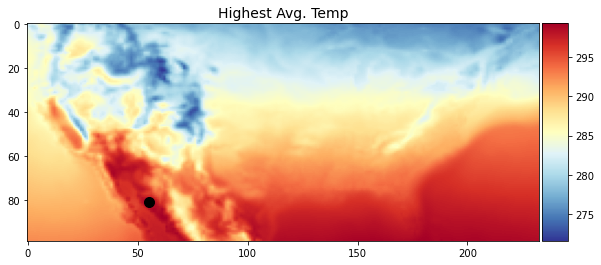

In [15]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Highest Avg. Temp", fontsize=14)
ax1.scatter(high_idx[1], high_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The highest average temperature was 79.07 F and found in northwest Mexico. 

***

* b) Lowest average air temperature (i.e. coldest place)

In [16]:
# Lowest temp location
min_temp_value = xds_yearly["t2m"][0,:,:].argmin()

In [17]:
# Highest value index
low_idx = np.unravel_index(min_temp_value, xds_yearly['t2m'][0,:,:].shape)
print(low_idx)

(21, 61)


In [18]:
cold = xds_yearly['t2m'][0, low_idx[0], low_idx[1]].values
print('Coldest average temperature for the year was %.2f F' % ((cold - 273.15) * 9/5 + 32))

Coldest average temperature for the year was 29.18 F


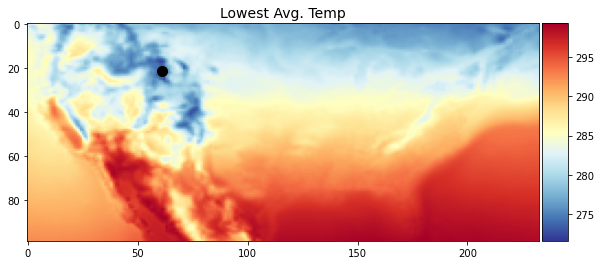

In [19]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Lowest Avg. Temp", fontsize=14)
ax1.scatter(low_idx[1], low_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The lowest average temperature was 29.18 F and found in the rocky mountains.

***

* c) Highest average cloudiness (i.e. cloudiest place)

In [20]:
# Cloudiest avg location
max_cloud_value = xds_yearly["tcc"][0,:,:].argmax()

In [21]:
# Highest value index
high_cloud_idx = np.unravel_index(max_cloud_value, xds_yearly['tcc'][0,:,:].shape)
print(high_cloud_idx)

(0, 0)


In [22]:
cloudy = xds_yearly['tcc'][0, high_cloud_idx[0], high_cloud_idx[1]].values
print('Cloudiest place was %.2f %%' % (cloudy * 100))

Cloudiest place was 77.15 %


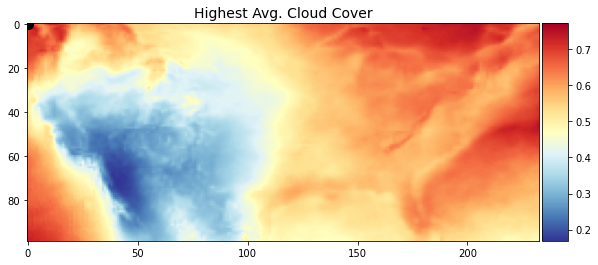

In [23]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['tcc'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Highest Avg. Cloud Cover", fontsize=14)
ax1.scatter(high_cloud_idx[1], high_cloud_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The highest average cloudcover was 77.15% and found off the coast of the pacific northewest.

***

* d) Lowest average cloudiest (i.e. least cloudy place)

In [24]:
# Least cloudy location
min_cloud_value = xds_yearly["tcc"][0,:,:].argmin()

In [25]:
# Highest value index
low_cloud_idx = np.unravel_index(min_cloud_value, xds_yearly['tcc'][0,:,:].shape)
print(low_cloud_idx)

(71, 41)


In [26]:
least_cloudy = xds_yearly['tcc'][0, low_cloud_idx[0], low_cloud_idx[1]].values
print('Least cloudy place was %.2f %%' % (least_cloudy * 100))

Least cloudy place was 16.89 %


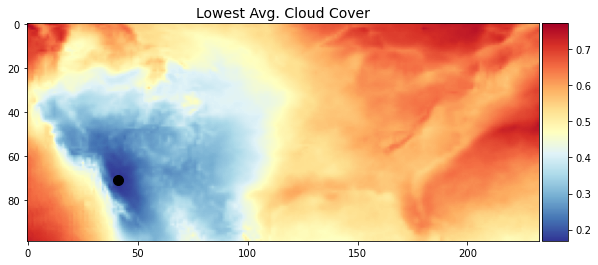

In [27]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_yearly['tcc'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Lowest Avg. Cloud Cover", fontsize=14)
ax1.scatter(low_cloud_idx[1], low_cloud_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The lowest average cloudcover was 16.89% and found east of the sierras.

***

* e) Place with highest range in air temperature

In [28]:
# Min value for all locations over the year
xds_year_min = xds.resample(time='1Y').min()
xds_year_min

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 268.8 268.9 ... 293.3 293.3
    tcc        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [29]:
# Max value for all locations over the year
xds_year_max = xds.resample(time='1Y').max()
xds_year_max

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 302.2 301.0 ... 302.4 302.6
    tcc        (time, latitude, longitude) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0

In [30]:
# Range from highest to lowest value of the year for each location
xds_range = xds_year_max - xds_year_min
xds_range

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 33.49 32.14 ... 9.113 9.284
    tcc        (time, latitude, longitude) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0

In [31]:
# Highest range location
max_range = xds_range['t2m'][0,:,:].argmax()
max_range_idx = np.unravel_index(max_range, xds_range['t2m'][0,:,:].shape)

In [32]:
# Lowest range location
min_range = xds_range['t2m'][0,:,:].argmin()
min_range_idx = np.unravel_index(min_range, xds_range['t2m'][0,:,:].shape)

In [33]:
min_range_temp = xds_range['t2m'][0, min_range_idx[0], min_range_idx[1]].values
print('Min range: %.2f kelvin' % (min_range_temp))

Min range: 8.84 kelvin


In [34]:
max_range_temp = xds_range['t2m'][0, max_range_idx[0], max_range_idx[1]].values
print('Max range: %.2f kelvin' % (max_range_temp))

Max range: 70.80 kelvin


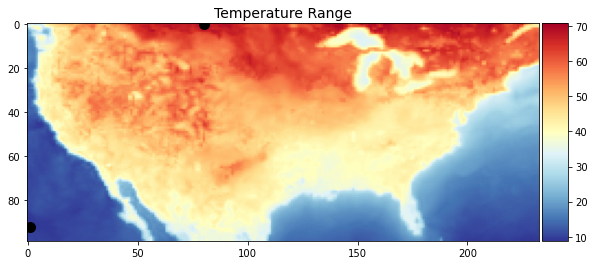

In [35]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_range['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Temperature Range", fontsize=14)
ax1.scatter(max_range_idx[1], max_range_idx[0], s=100, color='k')
ax1.scatter(min_range_idx[1], min_range_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

Off the coast of Baja California in the pacific ocean showed the smallest range in temperature, while northern Monatana showed the highest range of temperature.

***
* f) Place with the absolute coldest temperature on a single day 

In [36]:
# Use  dataset with minimum values for all locations over the year
xds_year_min

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 268.8 268.9 ... 293.3 293.3
    tcc        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [37]:
# Minimum temperature location
min_temp =  xds_year_min['t2m'][0,:,:].argmin()
min_temp_idx = np.unravel_index(min_temp, xds['t2m'][0,:,:].shape)

In [38]:
min_temp_value = xds_year_min['t2m'][0, min_temp_idx[0], min_temp_idx[1]].values
print('Lowest temp %.2f F' % ((min_temp_value - 273.15) * 9/5 + 32))

Lowest temp -34.91 F


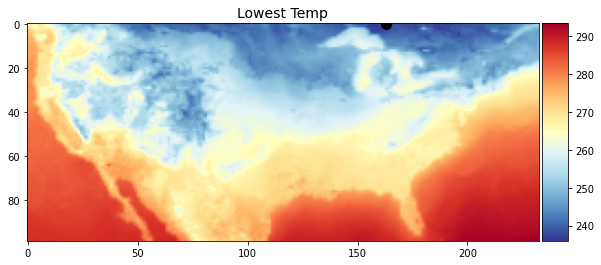

In [39]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds_year_min['t2m'][0,:,:], cmap='RdYlBu_r')

ax1.set_title("Lowest Temp", fontsize=14)
ax1.scatter(min_temp_idx[1], min_temp_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

The lowest recorded temperature for the year was -34.91 F in Canada north of the great lakes.

***

## Question 3

Display the Landsat image of Florence, OR as:

* a) an **NDVI** image (i.e. (Band 5 - Band 4) / (Band 5 + Band 4))

In [40]:
# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))

In [41]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

In [42]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndvi = np.divide((all_bands[:,:,5].astype(float) - all_bands[:,:,4].astype(float)), \
                 (all_bands[:,:,5].astype(float) + all_bands[:,:,4].astype(float))) # Extra credit for fixing this error...

In [43]:
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

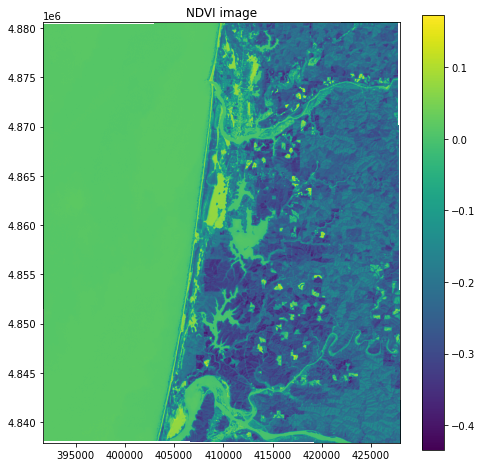

In [44]:
# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()

***

* b) a **color infrared composite** (i.e. bands 5, 4, 3)

In [45]:
# Convert values to a range of 0-255
all_bands_image = np.uint8((all_bands / 65536) * 255)

In [46]:
# Produce a new array by stacking the 5, 4, and 3 bands
false_color = np.dstack((all_bands_image[:,:,4],all_bands_image[:,:,3],all_bands_image[:,:,2]))

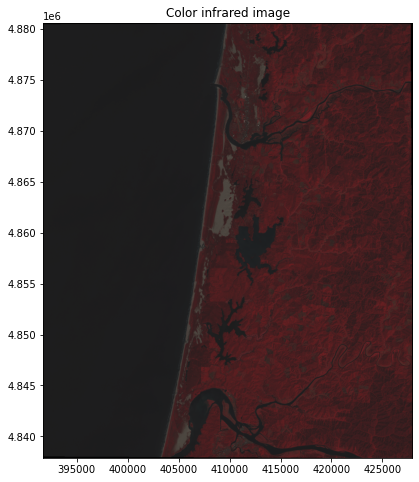

In [47]:
# Plot as Color infrared image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(false_color, extent=full_extent)
ax.set_title("Color infrared image")
plt.show()